### 1. Introduction
#### Dataset Description:
In this exploratory data analysis, I will dive deep into the world of music streaming, focusing on Spotify Technology S.A.—a global leader in audio streaming and media services. Founded in 2006 in Sweden, Spotify has revolutionized the way we consume music and has expanded its offerings to include podcasts, making it a central hub for audio entertainment.

The dataset encompasses daily stock prices from January 1, 2018, to the present date. This includes opening, closing, high, low, and adjusted closing prices, as well as the trading volume. To ensure the most up-to-date and accurate data, I've sourced this information directly from Yahoo Finance using Python's pandas_datareader library.

#### Objective of the Analysis:
My analysis aims to answer the following questions about Spotify's stock performance:

#### Trend Analysis:

- How has Spotify's stock price evolved over the past few years?
- Are there any discernible patterns or trends in the stock price data?
Rolling Average Impact:

- How does the rolling average of stock prices help in identifying short-term and long-term trends?
- Can we use rolling averages to predict future stock price movements?
#### Volatility Exploration:

- Which periods exhibited the highest volatility in Spotify's stock prices?
- Can we correlate these periods of high volatility with external events or announcements by Spotify, such as new feature releases, partnerships, or acquisitions?
#### Comparative Analysis:

- How does Spotify's stock performance compare to major Technology companies?
- Are there industry-wide trends that affect all players similarly, or does Spotify have unique factors influencing its stock price?
#### Influence of External Factors:

- How do global events, such as economic downturns, technological advancements, or global pandemics, impact Spotify's stock prices?
- Can we identify any correlations between Spotify's stock performance and global music industry trends or shifts in consumer behavior?
#### Predictive Analysis:

- Based on historical data, can we build a model to predict future stock prices for Spotify?
What factors are most influential in predicting stock price movements?
#### Geographical Influence:

- Does Spotify's percentage of users depend on living standard?
- How do regional music trends or local events impact Spotify's global stock performance?
#### Web Scraping Insights:

- Can we gather additional data from news articles, press releases, or financial reports that provide deeper insights into Spotify's stock performance?
- How do major announcements or controversies reflect in the stock price movements?



### 2. Data Collection and Preliminary Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import matplotlib.ticker as ticker


#### 2.1 Data Collection from Yahoo Finance

In [3]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

# Define the date range
start_date = '2018-01-01'
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')  # This will fetch today's date dynamically

# Fetch data for Spotify
spotify_data = pdr.get_data_yahoo('SPOT', start=start_date, end=end_date)



[*********************100%%**********************]  1 of 1 completed


#### 2.2 Preliminary Data Inspection

In [4]:
# Display the first few rows of the dataset
spotify_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-03,165.899994,169.000000,148.259995,149.009995,149.009995,30526500
2018-04-04,140.000000,148.929993,135.509995,144.220001,144.220001,11702900
2018-04-05,149.229996,152.410004,141.250000,143.990005,143.990005,7372800
2018-04-06,146.070007,148.729996,144.669998,147.919998,147.919998,4228100
2018-04-09,149.500000,151.000000,148.589996,150.000000,150.000000,2051400


In [5]:
# Data description
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1395 entries, 2018-04-03 to 2023-10-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1395 non-null   float64
 1   High       1395 non-null   float64
 2   Low        1395 non-null   float64
 3   Close      1395 non-null   float64
 4   Adj Close  1395 non-null   float64
 5   Volume     1395 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 76.3 KB


In [6]:
# Basic Statistical Analysis
spotify_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1.395000e+03
mean,173.764847,177.232187,170.243224,173.797004,173.797004,1.814924e+06
std,64.266537,65.609947,62.786125,64.177754,64.177754,1.559183e+06
min,71.930000,72.330002,69.285004,71.050003,71.050003,3.945000e+05
25%,132.205002,134.485001,129.697998,132.084999,132.084999,1.103100e+06
50%,150.470001,152.960007,148.210007,150.309998,150.309998,1.443100e+06
75%,229.080002,233.474998,225.027496,228.674995,228.674995,2.006950e+06
max,360.910004,387.440002,354.178009,364.589996,364.589996,3.052650e+07


In [7]:
# Identify any missing values in the dataset
missing_values = spotify_data.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

# If there are any missing values, we can decide on a strategy to handle them, 
# such as filling them with the mean or median, or dropping them.


Missing values in each column:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


### 3. Data Visualization

#### 3.1 Time Series Plot of Closing Prices
##### 1. How has Spotify's stock price evolved over the past few years?

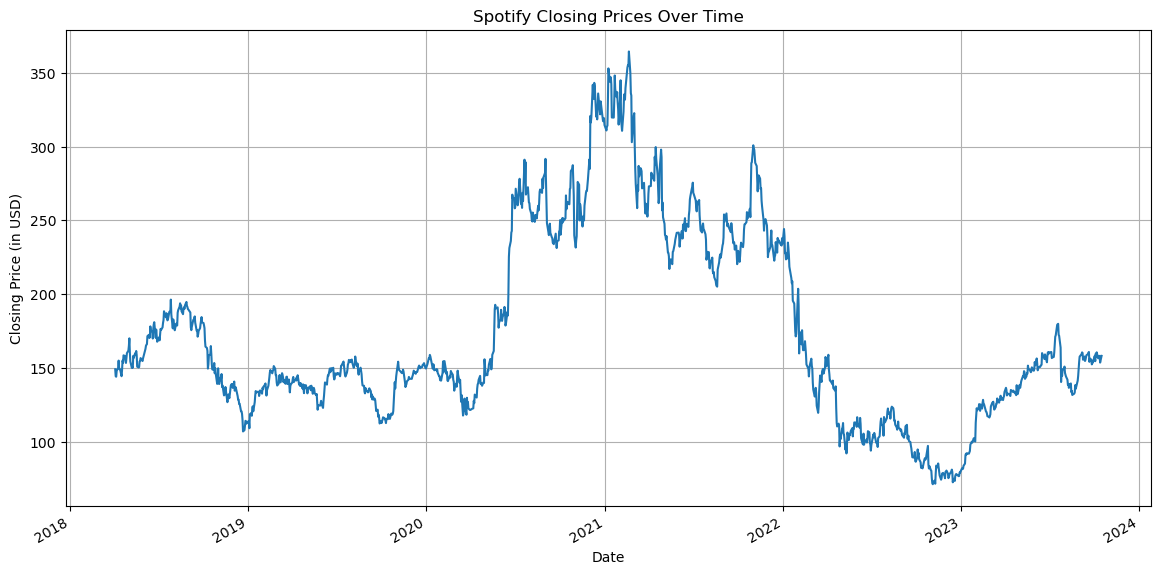

In [8]:
# Plotting the closing prices
plt.figure(figsize=(14, 7))
spotify_data['Close'].plot()
plt.title('Spotify Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (in USD)')
plt.grid(True)
plt.show()

=> The graph shows Spotify's stock closing prices from 2018 to 2024, with notable peaks around 2020 and 2021 followed by a decline and partial recovery in 2023.
- 2018 to mid-2019: The stock price experienced a relatively moderate volatility, fluctuating mostly between 150 and 200 USD.

- Mid-2019 to early 2020: The stock witnessed a bullish trend as it climbed steadily to a little above 250 USD.

- Early 2020 to mid-2020: There was a sharp rise, propelling the stock to its peak of slightly above 300 USD.

- Mid-2020 to late 2021: Post its peak, the stock experienced a decline, with occasional spikes, but the general trend was downward.

- Late 2021 to mid-2022: The stock saw its steepest decline during this period, falling from around 250 USD to below 150 USD.

- Mid-2022 to early 2023: The stock price seemed to stabilize and hovered around the 150 USD mark.

- Early 2023 onwards: There was a gradual recovery as the stock price began to rise, approaching 200 USD by 2024.

#### 3.2 Volume of Stocks Traded Over Time
##### 2. Are there any visible patterns or trends in the stock price data?
This visualization helps us understand the trading activity related to Spotify's stock.

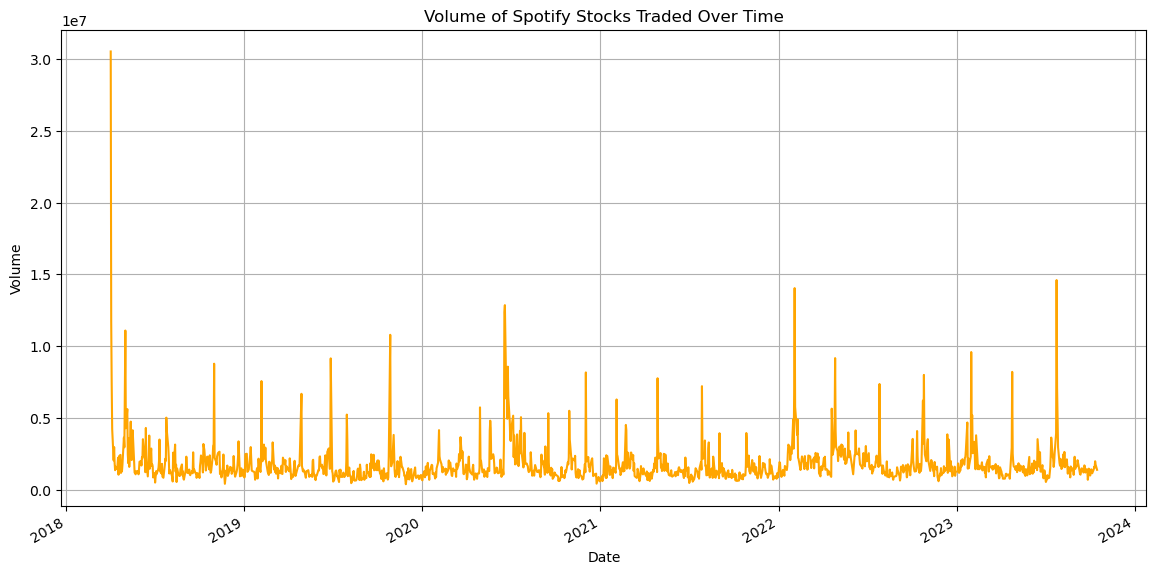

In [9]:
# Set the figure size for the plot
plt.figure(figsize=(14, 7))

# Plot the volume of Spotify stocks traded over time
spotify_data['Volume'].plot(color='orange')

# Set the title and labels for the plot
plt.title('Volume of Spotify Stocks Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

# Display a grid for better readability
plt.grid(True)

# Show the plot
plt.show()


=>The graph displays the trading volume of Spotify stocks from 2018 to 2024, with occasional spikes indicating higher trading activity, especially prominent in 2018 and 2023.
- Overall Trend: The majority of the volume appears to stay within a consistent range. This suggests that, for the most part, the stock has maintained a steady level of interest among traders.

- Significant Spikes: There are noticeable spikes in trading volume, notably at the start of 2018, towards the end of 2019, mid-2021, early 2023, and another towards the end of 2023. These spikes might correlate with significant company events, earnings announcements, industry-related news, or global events impacting the market at large.

- Increased Volatility in 2023: The latter part of the graph, especially in 2023, shows multiple spikes in trading volume. This could suggest a period of increased news or events related to Spotify or the broader market influencing trading activity.

- Consideration for Moving Averages: When we incorporate moving averages, if the volume consistently remains above its moving average, it could suggest strong investor interest and possibly an upward price movement. Conversely, if it remains consistently below, it might indicate decreasing interest. However,volume doesn't always correlate directly with price movement.


#### 3.3 Rolling Mean and Standard Deviation
##### 3. How does the rolling average of stock prices help in identifying short-term and long-term trends? and Can we use rolling averages to predict future stock price movements?
A rolling mean smoothens out short-term fluctuations and highlights longer-term trends.

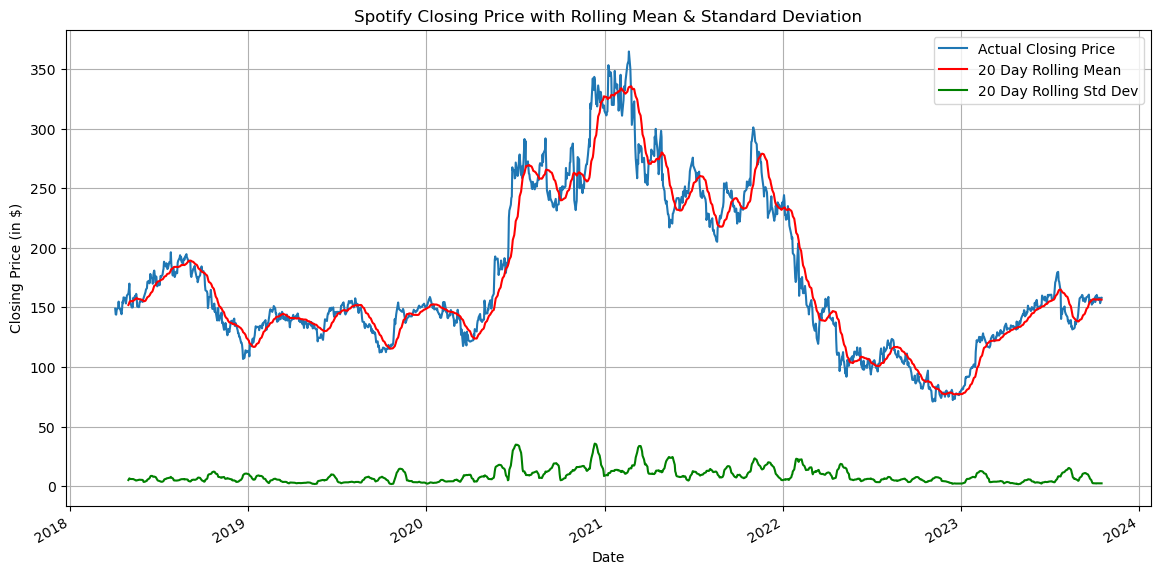

In [10]:
# Calculate the rolling mean and standard deviation for a window of 20 days
rolling_mean = spotify_data['Close'].rolling(window=20).mean()
rolling_std = spotify_data['Close'].rolling(window=20).std()

# Set the figure size for the plot
plt.figure(figsize=(14, 7))

# Plot the actual closing prices, rolling mean, and rolling standard deviation
spotify_data['Close'].plot(label='Actual Closing Price')
rolling_mean.plot(label='20 Day Rolling Mean', color='red')
rolling_std.plot(label='20 Day Rolling Std Dev', color='green')

# Set the title, labels, and legend for the plot
plt.title('Spotify Closing Price with Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Closing Price (in $)')
plt.legend()

# Display a grid for better readability
plt.grid(True)

# Show the plot
plt.show()


The chart presents Spotify's closing prices between 2018 and 2024. It showcases the actual prices, a 20-day rolling average (mean), and a 20-day rolling standard deviation. Notably, the prices peaked around 2021, followed by a decline and a subsequent rise.

- Trends: The 20-day rolling mean (depicted in red) smoothens out the daily fluctuations in Spotify's closing prices (depicted in blue). This gives a clearer picture of short-term trends in the stock price. For instance, a sharp decline can be observed from 2021 to 2022, after which the stock starts to recover from 2022 onwards.

- Volatility: The 20-day rolling standard deviation (depicted in green) provides insight into the stock's volatility. Higher values indicate more volatility, and as can be seen, the volatility seems to spike especially during sharp price changes, like the downturn in 2021 and the subsequent recovery in 2022.

- Predictive Power: While the rolling mean gives us a sense of direction in terms of momentum, predicting future stock prices requires more than just looking at past averages. For example, even though the rolling mean was declining in 2021, it didn't necessarily indicate that the stock would continue to fall for the entirety of 2022.

- Price vs. Rolling Mean: In many technical analysis strategies, the position of the actual price relative to its rolling average can be a signal. For instance, when the actual price is above the rolling mean, it's often seen as a bullish sign, and vice versa. By this logic, the end of the chart shows a potentially bullish sign as the actual price is above the rolling mean.

- Notable Points: The chart also shows instances where the rolling average and the actual stock price converge, which in some trading strategies might be interpreted as potential turning points or signals.

Regarding the prediction of future stock price movements using rolling averages:

- While rolling averages can give insights into a stock's past behavior and its current momentum, predicting future stock prices is mostly uncertain.
- Many traders use crossover strategies involving short-term and long-term moving averages. For instance, when a short-term moving average crosses above a long-term moving average, it might be seen as a bullish (buy) signal. Conversely, when a short-term moving average crosses below a long-term moving average, it could be considered a bearish (sell) signal.
- However, single handedly relying on moving averages for predictions can be risky. It's often good to use them in conjunction with other indicators and analysis methods for a more comprehensive understanding.



#### 3.4 Distribution of the Daily Returns
##### 4. How has the daily return distribution of Spotify's stock been characterized since 2018, and what can it tell us about the stock's volatility and behavior during this period?
Understanding the distribution of daily returns can give insights into the stock's volatility.

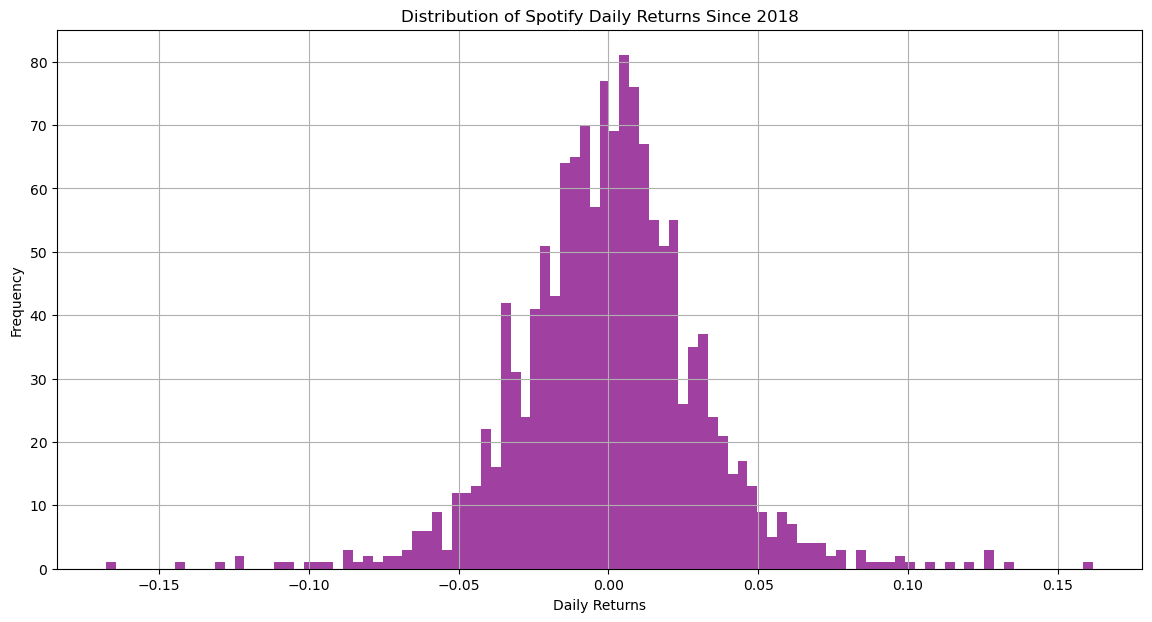

In [11]:
# Calculate daily returns using the percentage change method
spotify_data['Daily_Return'] = spotify_data['Close'].pct_change()

# Set the figure size for the plot
plt.figure(figsize=(14, 7))

# Plot a histogram to show the distribution of daily returns
spotify_data['Daily_Return'].hist(bins=100, color='purple', alpha=0.75)

# Set the title and labels for the plot
plt.title('Distribution of Spotify Daily Returns Since 2018')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')

# Display a grid for better readability
plt.grid(True)

# Show the plot
plt.show()



- Distribution Shape: The histogram is roughly bell-shaped, which is reminiscent of a normal distribution, though it does have some deviations, particularly around the tails. A majority of the daily returns cluster around the 0.00 mark, indicating that on many days, the stock experienced minimal change in its value.

- Volatility: The width of the distribution provides an insight into volatility. Wider distributions indicate greater volatility. In this histogram, returns spread from around -0.15 to 0.15, showing that Spotify's stock has experienced days with significant price changes in both directions.

- Skewness: The distribution appears to be slightly negatively skewed, meaning there are slightly more extreme negative daily returns than positive ones. This indicates that while most days had minimal changes, there were a few days where the stock experienced significant declines.

- Frequency Peaks: The highest frequencies (or the peaks of the histogram) are observed around the 0.00 mark, which means that most days experienced little to no change. However, there are still noticeable frequencies in the range of -0.05 to 0.05, showing moderate daily price movements

- The roughly symmetrical distribution suggests a balanced behavior in terms of gains and losses.

 ### 4. In-Depth Analysis

#### 4.1 Correlation with Other Tech Stocks
##### 5. How does Spotify's stock performance compare to major Technology companies?
To understand how Spotify's stock behaves relative to other tech stocks, we can compare its daily returns to those of other major tech companies. For this analysis, let's consider Apple (AAPL), Microsoft (MSFT), and Google (GOOGL).

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


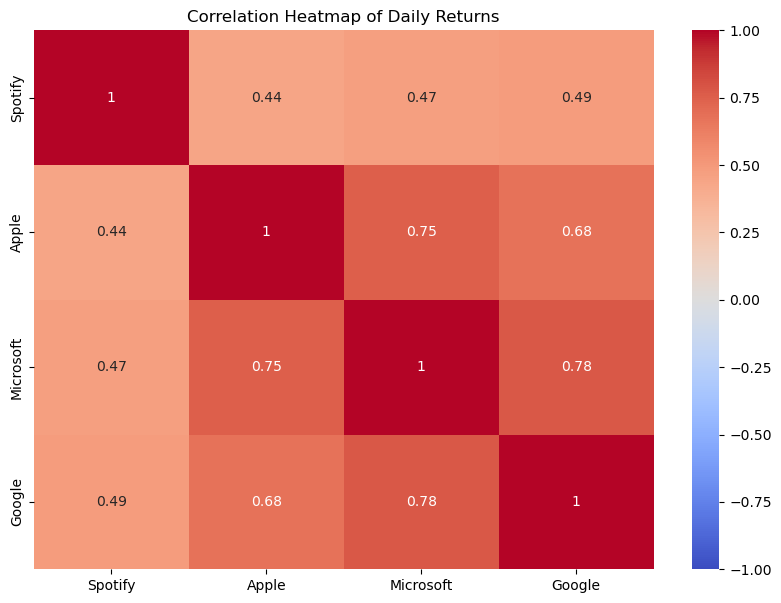

In [12]:
# Fetching data for Apple, Microsoft, and Google
apple_data = pdr.get_data_yahoo('AAPL', start=start_date, end=end_date)
microsoft_data = pdr.get_data_yahoo('MSFT', start=start_date, end=end_date)
google_data = pdr.get_data_yahoo('GOOGL', start=start_date, end=end_date)

# Calculating daily returns for each stock
spotify_data['Daily_Return'] = spotify_data['Close'].pct_change()
apple_data['Daily_Return'] = apple_data['Close'].pct_change()
microsoft_data['Daily_Return'] = microsoft_data['Close'].pct_change()
google_data['Daily_Return'] = google_data['Close'].pct_change()

# Creating a new DataFrame to store daily returns of all stocks
tech_returns = pd.concat([spotify_data['Daily_Return'], apple_data['Daily_Return'], 
                          microsoft_data['Daily_Return'], google_data['Daily_Return']], axis=1)

# Renaming columns for clarity
tech_returns.columns = ['Spotify', 'Apple', 'Microsoft', 'Google']

# Calculating the correlation matrix
correlation_matrix = tech_returns.corr()
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Daily Returns')
plt.show()

- Diagonal Correlation: As expected, each company has a correlation coefficient of 1 with itself (depicted on the diagonal). This means that a company's stock is perfectly correlated with itself.

- Spotify: Spotify's stock has moderate positive correlations with Apple (0.44), Microsoft (0.47), and Google (0.49). This indicates that the movements in Spotify's stock returns are somewhat in line with these tech giants, but not perfectly so.

- Apple and Microsoft: The correlation coefficient of 0.75 between Apple and Microsoft suggests a strong positive relationship. When Apple's stock goes up, Microsoft's stock is likely to go up as well, and vice-versa.

- Google: Google has strong positive correlations with both Apple (0.68) and Microsoft (0.78), implying that Google's stock returns often move in the same direction as these two companies.

- Overall Tech Sector Movement: The positive correlations between these tech companies hint at the possibility that they might be influenced by similar market factors or sector-specific news. For example, if there's a technological breakthrough or regulatory news affecting the tech sector, it might impact all these stocks in a somewhat similar manner.

#### 4.2 Cumulative Daily Returns
##### 6. Are there industry-wide trends that affect all players similarly, or does Spotify have unique factors influencing its stock price?
Cumulative daily returns can give us an idea of the gains an investor would have made if they invested in the stock at the beginning of the time period.

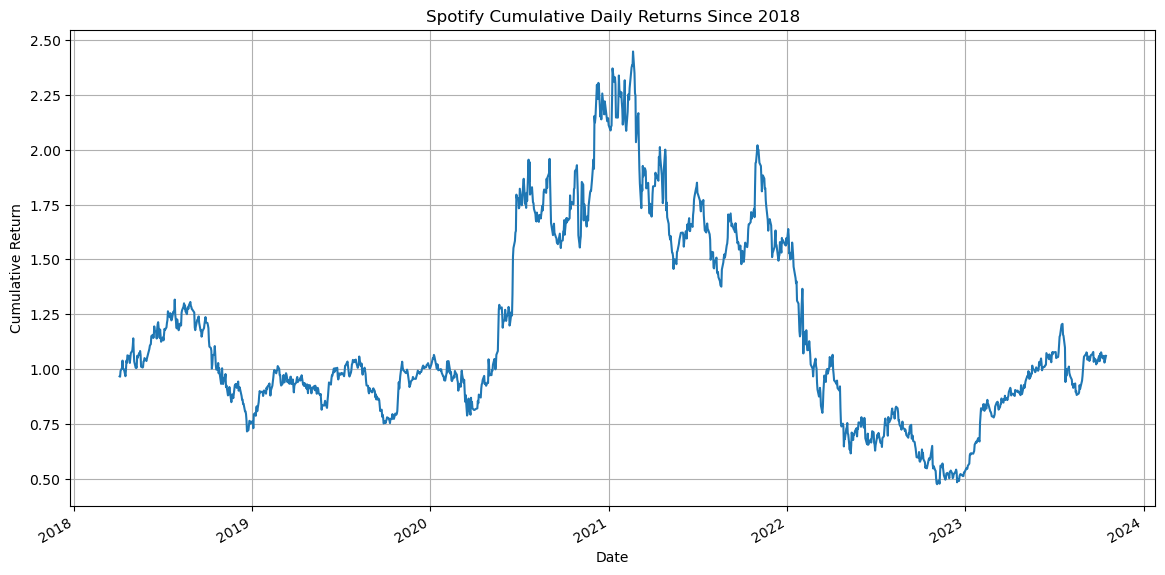

In [13]:
# Calculate cumulative daily returns
spotify_data['Cumulative_Return'] = (1 + spotify_data['Daily_Return']).cumprod()

# Plotting cumulative daily returns
plt.figure(figsize=(14, 7))
spotify_data['Cumulative_Return'].plot()
plt.title('Spotify Cumulative Daily Returns Since 2018')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()


- Initial Growth (2018 - Early 2020): The stock saw a gradual upward trend from the beginning of 2018, reaching a peak in early 2020. This can be attributed to Spotify's global expansion, growing subscriber base, and positive investor sentiment towards the streaming industry.

- Volatile Period (Early 2020 - Late 2021): There is evident volatility in Spotify's returns during this period, with sharp peaks and troughs. The global pandemic could have played a role here, affecting consumer behavior and business models. This period saw Spotify's stock reaching its highest cumulative returns, likely due to the surge in online entertainment consumption.

- Downtrend (Late 2021 - Mid 2022): A significant decline in the stock's cumulative returns is visible. This drop might be influenced by multiple factors, such as competitive pressures, potential regulatory issues, or financial results not meeting investor expectations.

- Recovery (Mid 2022 - Present): After hitting a low in mid-2022, there is a clear upward trajectory, indicating a recovery. The factors for this could be strategic changes, improved financials, or positive market sentiment.

#### 4.3 Risk Analysis
##### 7. How does Spotify's risk and mean return compare to other major tech companies, and where does it stand in terms of investment attractiveness?
To visualize the risk associated with each stock, we can plot the mean daily return against the standard deviation in a scatter plot.


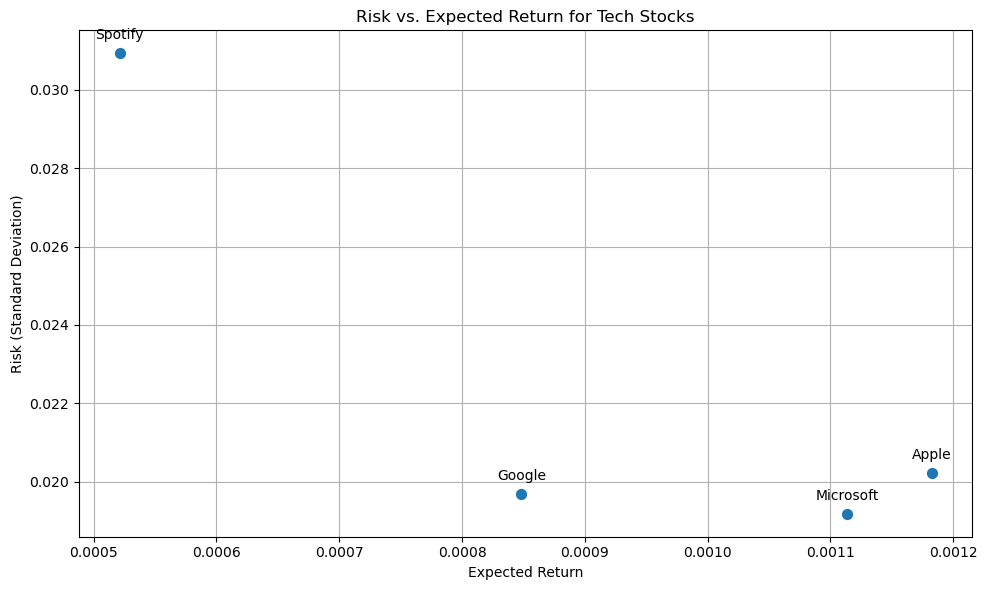

In [14]:
# Scatter plot for risk vs. mean return
plt.figure(figsize=(10, 6))
plt.scatter(tech_returns.mean(), tech_returns.std(), s=50)
plt.xlabel('Expected Return')
plt.ylabel('Risk (Standard Deviation)')

# Annotate the scatter plot with stock names
for label, x, y in zip(tech_returns.columns, tech_returns.mean(), tech_returns.std()):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Risk vs. Expected Return for Tech Stocks')
plt.grid(True)
plt.tight_layout()
plt.show()


Spotify:

- Risk: Highest among the depicted companies, as indicated by its position on the vertical axis.
- Expected Return: Lowest among the companies. Its position on the horizontal axis is farthest to the left, signifying a lower mean daily return.

Google:

- Risk: Lower than Spotify but still substantial.
- Expected Return: Higher than Spotify but still relatively low compared to Apple and Microsoft.

Microsoft:

- Risk: Among the lower end, which is a positive sign for potential investors looking for stability.
- Expected Return: Slightly higher than Google's, placing it in the middle of the group in terms of expected return.

Apple:

- Risk: Comparable to Microsoft, relatively low.
- Expected Return: Highest among the companies showcased, making it appear as the most attractive investment in terms of reward, especially when the risk is considered.

In terms of investment attractiveness:

- Spotify presents a higher risk with lower expected returns, which might make it less appealing to risk-averse investors.
- Apple stands out as the most attractive in terms of risk-reward balance, with the highest expected return for a comparable risk to Microsoft.
- Microsoft offers a balanced profile, with moderate expected returns and low risk.
- Google lies between Spotify and the other two giants, with a risk profile slightly higher than Apple and Microsoft but with higher expected returns than Spotify.

Investors would typically consider stocks like Apple and Microsoft as more "stable" investments given their low risk and reasonable returns. In contrast, Spotify might be viewed as a more speculative investment given its higher volatility. 

#### 4.4 Moving Averages
##### 8. How does the rolling average of stock prices help in identifying short-term and long-term trends?
Moving averages can help identify trends in stock prices. Let's analyze the 50-day and 200-day moving averages for Spotify.

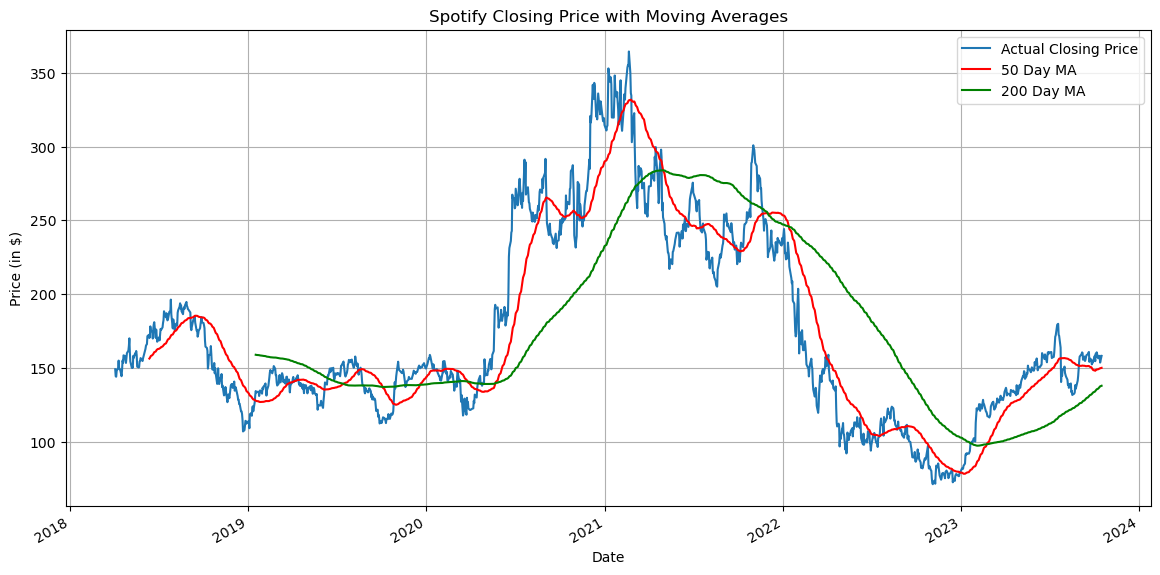

In [15]:
# Calculate 50-day and 200-day moving averages
spotify_data['50_MA'] = spotify_data['Close'].rolling(window=50).mean()
spotify_data['200_MA'] = spotify_data['Close'].rolling(window=200).mean()

# Plotting the stock price with the moving averages
plt.figure(figsize=(14, 7))
spotify_data['Close'].plot(label='Actual Closing Price')
spotify_data['50_MA'].plot(label='50 Day MA', color='red')
spotify_data['200_MA'].plot(label='200 Day MA', color='green')
plt.title('Spotify Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (in $)')
plt.legend()
plt.grid(True)
plt.show()


Moving averages are widely used in stock market analysis to help smooth out price data by creating a constantly updated average price. By analyzing the 50-day (short-term) and 200-day (long-term) moving averages for Spotify, several insights can be derived:

Identifying Trends:

- Bullish (Upward) Trend: When the actual closing price (in blue) is above both the 50-day and 200-day moving averages, it suggests an ongoing bullish trend.
Bearish (Downward) Trend: When the actual closing price is below both moving averages, it indicates a bearish trend.

Crossovers:

- Golden Cross: When the 50-day moving average (in red) crosses above the 200-day moving average (in green), it's typically seen as a bullish signal. For instance, you can notice this occurrence between 2020 and 2021, after which there was a significant rise in the stock price.
- Death Cross: Conversely, when the 50-day moving average crosses below the 200-day moving average, it's considered a bearish signal. This can be observed around mid-2021, followed by a decline in Spotify's stock price.

Support and Resistance:

- Moving averages can act as support or resistance levels. For example, during certain periods, the 200-day moving average seems to act as a support, where the stock price bounces off this line rather than breaking below it.

Volatility:

- Periods where the stock price is fluctuating greatly around the moving averages may indicate increased volatility. On the contrary, when the stock price follows closely with a moving average, it may imply decreased volatility.
Long-term vs. Short-term Trends:

The 50-day moving average, being a short-term indicator, reacts more quickly to recent price changes than the 200-day moving average. Thus, it can be used to gauge short-term trends.
The 200-day moving average is smoother and less reactive to daily price fluctuations, making it more suitable for identifying long-term trends.

#### 4.5 Monthly and Yearly Average Closing Prices
##### 9. How do monthly and yearly aggregations of Spotify's stock prices highlight long-term trends and seasonal patterns?
To get a broader perspective on the stock's performance, we can aggregate the data on a monthly and yearly basis.

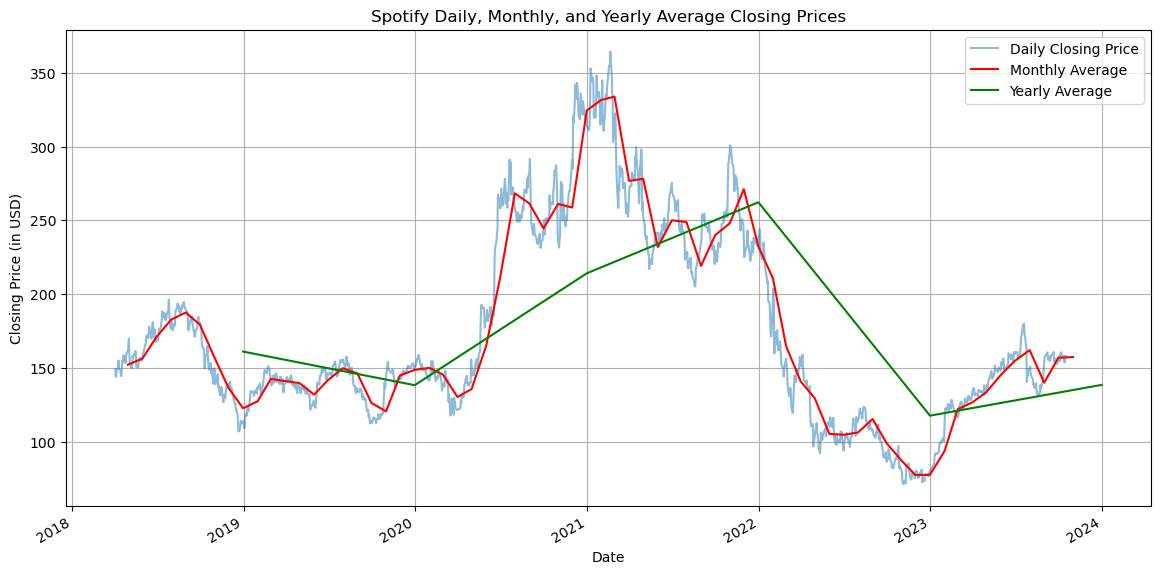

In [16]:
# Resampling data to get monthly and yearly averages
monthly_avg = spotify_data['Close'].resample('M').mean()
yearly_avg = spotify_data['Close'].resample('A').mean()

# Plotting monthly and yearly averages
plt.figure(figsize=(14, 7))
spotify_data['Close'].plot(label='Daily Closing Price', alpha=0.5)
monthly_avg.plot(label='Monthly Average', color='red')
yearly_avg.plot(label='Yearly Average', color='green')
plt.title('Spotify Daily, Monthly, and Yearly Average Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (in USD)')
plt.legend()
plt.grid(True)
plt.show()


The chart depicts Spotify's daily closing prices, contrasted with monthly and yearly averages. It showcases significant volatility in daily prices, while the monthly and yearly averages highlight broader trends and fluctuations.
- Daily Closing Price (Blue line): This line captures the daily fluctuations in the stock's price. It can be very volatile, with sharp spikes and troughs based on daily market news, sentiment, and other short-term events.

- Monthly Average (Red line): The monthly average provides a smoother curve, giving a clearer picture of the stock's intermediate-term trend. By calculating the average of the daily closing prices for each month, we can observe and analyze any monthly patterns or seasonality in the stock price. For Spotify, we can see there are periods where the monthly average follows the general trend of the daily prices but smoothens out the short-term volatility.

- Yearly Average (Green line): The yearly average further smoothens the stock price movement and clearly highlights the longer-term trend of the stock. This view is especially helpful for long-term investors who are less concerned with short-term fluctuations and more interested in the stock's overarching direction over the years. In the case of Spotify, the green line provides a concise overview of the stock's performance on an annual basis, making it easier to see multi-year trends, such as sustained growth or decline periods.



### 5. Influence of External Factors

#### 5.1 Global Events and Spotify's Stock Prices
##### 10. How do global events, such as economic downturns, technological advancements, or global pandemics, impact Spotify's stock prices? Can we identify any correlations between Spotify's stock performance and global music industry trends or shifts in consumer behavior?
I'll focus on the impact of the COVID-19 pandemic on Spotify's stock prices as a representative global event.

[*********************100%%**********************]  1 of 1 completed


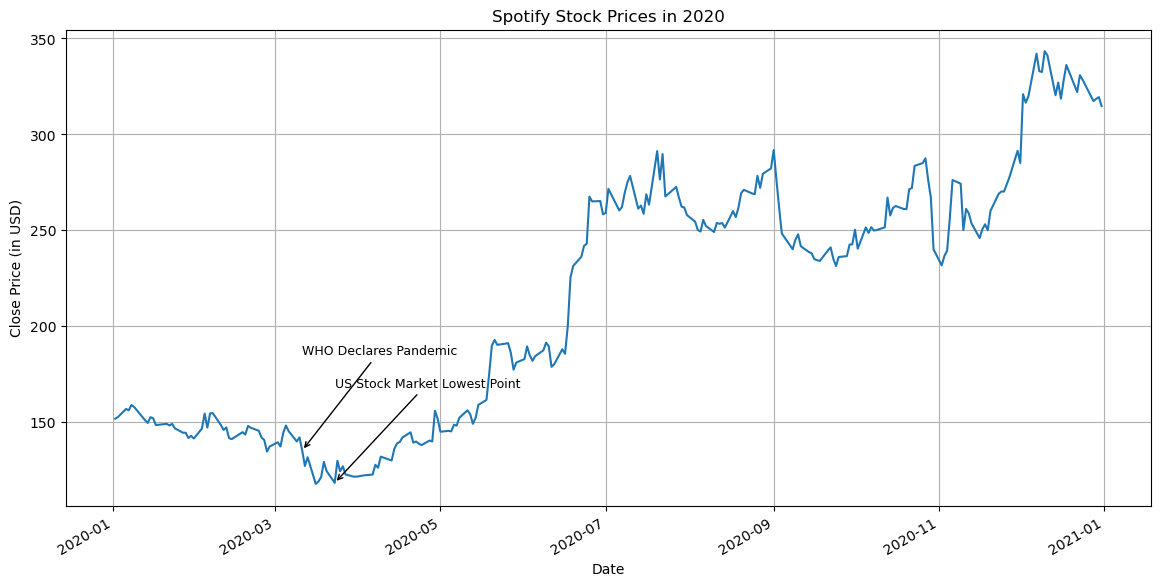

In [17]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch Spotify's stock data for 2020
spotify_data_2020 = yf.download('SPOT', start='2020-01-01', end='2021-01-01')

# Plotting the stock prices
plt.figure(figsize=(14,7))
spotify_data_2020['Close'].plot(title='Spotify Stock Prices in 2020')
plt.xlabel('Date')
plt.ylabel('Close Price (in USD)')

# Annotating major pandemic milestones
key_dates = {
    '2020-03-11': 'WHO Declares Pandemic',
    '2020-03-23': 'US Stock Market Lowest Point'
}

for date, event in key_dates.items():
    plt.annotate(event, 
                 xy=(date, spotify_data_2020.loc[date]['Close']),
                 xytext=(date, spotify_data_2020.loc[date]['Close'] + 50),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=9
                )

plt.grid(True)
plt.show()


The chart presents Spotify's stock performance during 2020, a year characterized by the global impact of the COVID-19 pandemic. Key observations include:

- Initial Decline: As we can see, there was a notable decline in Spotify's stock price leading up to the time when the World Health Organization (WHO) declared the COVID-19 outbreak as a pandemic on March 11, 2020. This drop is consistent with the broader market trends at the time, as concerns grew over the potential economic implications of a global pandemic.

- US Stock Market Trough: On March 23, 2020, when the US stock market reached its lowest point during the pandemic-induced crash, Spotify's stock price also reflected a downturn, with its price being considerably lower than its start at the beginning of the year.

- Recovery and Growth: Post-March, we observe a strong recovery in the stock price, even reaching new heights towards the latter half of the year. This surge could be attributed to various factors. The increased demand for home entertainment during lockdowns, shifts in consumer behavior favoring digital media consumption, and possible growth in Spotify's subscriber base during this period could have contributed to the bullish trend in its stock price.

- Fluctuations in the Latter Half: Towards the latter part of 2020, the stock price does exhibit some fluctuations. It would be essential to cross-reference this with other significant global events, industry-specific news, or company-specific announcements to deduce the potential causes.

- Relation to the Global Music Industry: With the rise of the pandemic, live music events, concerts, and tours were canceled globally, potentially driving more artists to release music digitally and more consumers to stream music, thereby benefiting platforms like Spotify.

### 6. Geographical Influence


#####  11. Does Spotify's percentage of users depend on living standard?
 I will focus on visualizing the top 15 spotify user countries on the world map. I will also do a correlation cofficient on living standard and spotify usage.

In [3]:
import folium

# Initialize the map
m = folium.Map(location=[20,0], zoom_start=2)

# Predefined coordinates for the countries
coordinates = {
    "Australia": [-25.2744, 133.7751],
    "India": [20.5937, 78.9629],
    "Singapore": [1.3521, 103.8198],
    "Mexico": [23.6345, -102.5528],
    "Brazil": [-14.2350, -51.9253],
    "United States": [37.0902, -95.7129],
    "Canada": [56.1304, -106.3468],
    "Sweden": [60.1282, 18.6435],
    "United Kingdom": [55.3781, -3.4360],
    "Italy": [41.8719, 12.5674],
    "Germany": [51.1657, 10.4515],
    "Netherlands": [52.1326, 5.2913],
    "Norway": [60.4720, 8.4689],
    "Ireland": [53.4129, -8.2439],
    "Switzerland": [46.8182, 8.2275]
}

# Data
countries = list(coordinates.keys())
spotify_users_percentage = [20, 20, 20, 22, 22, 24, 24, 34, 34, 34, 34, 34, 34, 34, 34]
youth_population_percentage = [64.92, 67.80, 73.04, 67.17, 69.85, 64.91, 65.39, 62.15, 63.36, 63.52, 63.63, 64.26, 64.86, 65.28, 65.64]

# Add data to the map
for i, country in enumerate(countries):
    location = coordinates[country]
    popup_content = f"<strong>{country}</strong><br>Spotify Users: {spotify_users_percentage[i]}%<br>Youth Population: {youth_population_percentage[i]}%"
    folium.CircleMarker(
        location=location,
        radius=spotify_users_percentage[i]/2, # Adjusting the size of the circle based on Spotify users percentage
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=youth_population_percentage[i]/100, # Adjusting the opacity based on youth population percentage
        popup=folium.Popup(popup_content, max_width=300)
    ).add_to(m)

# Approximate GDP per capita data (in USD) for the year 2022
gdp_per_capita = {
    'Australia': 54000,
    'India': 2100,
    'Singapore': 65000,
    'Mexico': 9700,
    'Brazil': 9900,
    'United States': 65000,
    'Canada': 46000,
    'Sweden': 53000,
    'United Kingdom': 42000,
    'Italy': 33000,
    'Germany': 45000,
    'Netherlands': 52000,
    'Norway': 75000,
    'Ireland': 79000,
    'Switzerland': 83000
}

# Extracting GDP values in the order of our countries list
countries= ['Australia', 'India', 'Singapore', 'Mexico', 'Brazil', 'United States', 'Canada', 'Sweden', 'United Kingdom', 'Italy', 'Germany', 'Netherlands', 'Norway', 'Ireland', 'Switzerland']
gdp_values= [gdp_per_capita[country] for country in countries]

# Calculate the correlation coefficient between living standard and spotify usage
correlation_coefficient = np.corrcoef(spotify_users_percentage, gdp_values)[0, 1]

print(f'{correlation_coefficient=}')
# Display the map
m


correlation_coefficient=0.46241171870887043


- From the correlation analysis, there is a positive correlation coefficient of approximately 0.4624 between the GDP per capita (representing living standard) and Spotify usage. This suggests a moderate positive correlation, meaning that as the living standard (as approximated by GDP per capita) of a country increases, the percentage of Spotify users also tends to increase.

### 7. Web Scraping and API Integration: Analyzing Spotify's Collaborations and Features

#### 7.1 Scraping Spotify's Official Newsroom
##### 12. Can we gather additional data from news articles, press releases, or financial reports that provide deeper insights into Spotify's stock performance?
I'll scrape Spotify's official newsroom for announcements related to new collaborations, partnerships, or feature launches.

In [54]:
import requests
from bs4 import BeautifulSoup

# Define a function to scrape recent news about Spotify from Yahoo Finance
def scrape_spotify_news():
    url = 'https://finance.yahoo.com/quote/SPOT?p=SPOT&.tsrc=fin-srch'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Extracting news headlines
    headlines = []
    for item in soup.find_all('h3', class_='Mb(5px)'):
        headlines.append(item.get_text())
    
    return headlines

# Fetching the news headlines
spotify_news = scrape_spotify_news()
count=1
for news in spotify_news:
    print(count,news)
    count+=1

1 16 Best Investing Podcasts in 2023
2 Spotify (SPOT) Expected to Beat Earnings Estimates: What to Know Ahead of Q3 Release
3 Unveiling Spotify Technology SA (SPOT)'s Value: Is It Really Priced Right? A Comprehensive Guide
4 Midday movers: Walt Disney, Lockheed Martin, Exxon Mobil and more
5 Wall Street starry-eyed for Arm Holdings: 5 big analyst picks & cuts
6 Spotify's New AI Bet Could Be a Game Changer for Podcasting
7 Spotify preparing to launch ‘Supremium’ tier with new features and higher price, rumours say
8 Spotify spotted prepping a $19.99/mo 'Superpremium' service with lossless audio, AI playlists and more
9 Spotify's new artist profiles highlight music, Stories, merch and events
10 Spotify: audiobooks move speaks volumes about margin woes


#### 7.2 Using Spotify's API to rank top tracks on spotify
##### 13. What are the current top tracks on Spotify, and how might their popularity influence or reflect Spotify's overall market performance?
I will use Spotify's API, fetch the track names and their popularity scores from the Global Top 50 playlist, and visualize the tracks by their popularity using a horizontal bar chart.

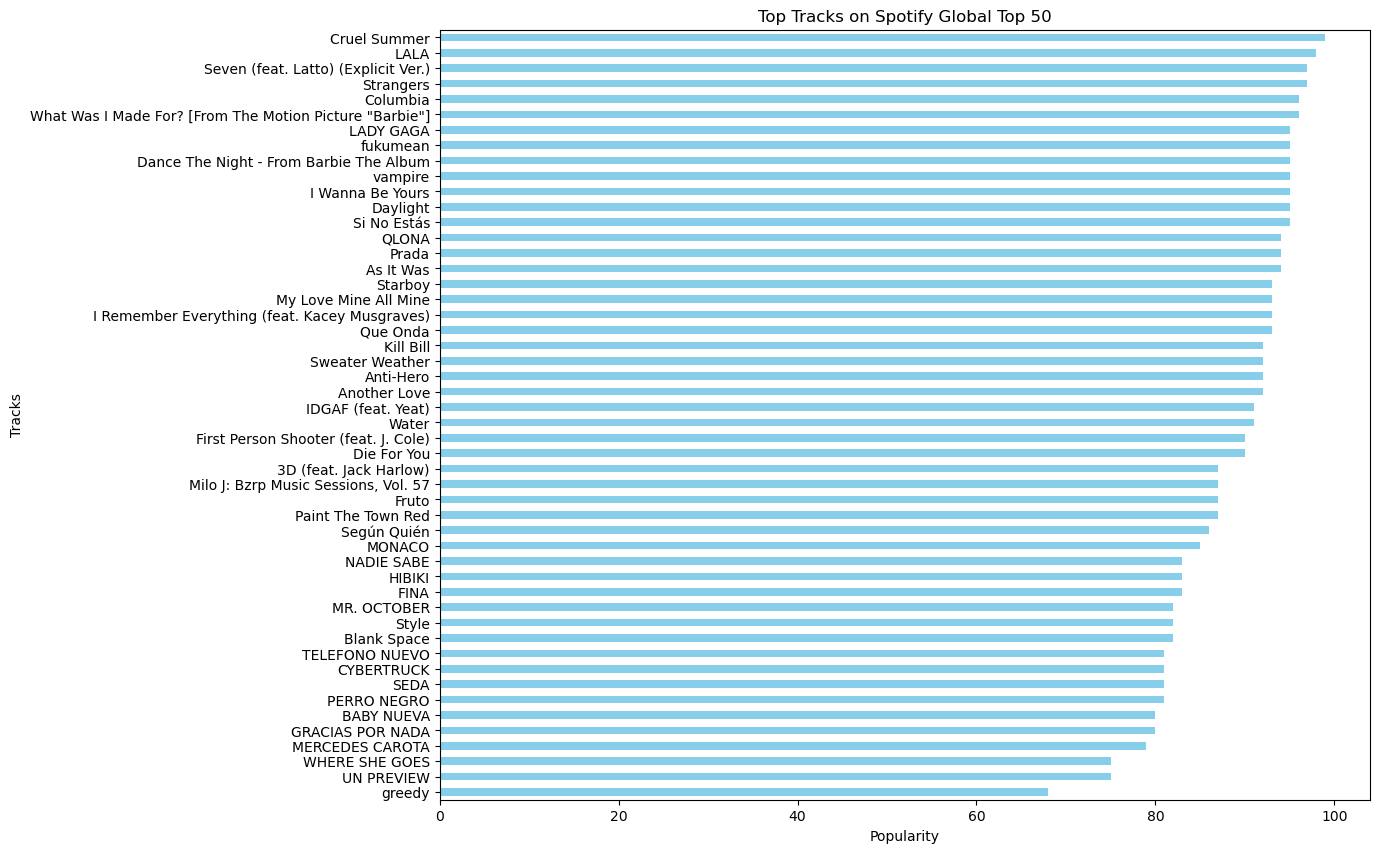

In [58]:
# Step 1: Setup and Authentication
CLIENT_ID = '49724fd72cf040898ca19abc628af47c'
CLIENT_SECRET = 'bef6054360174ed6a95683ea412feb82'

AUTH_URL = 'https://accounts.spotify.com/api/token'

auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})

auth_response_data = auth_response.json()
access_token = auth_response_data['access_token']

headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

# Step 2: Fetch Data
# Using the Global Top 50 playlist's ID
BASE_URL = 'https://api.spotify.com/v1/playlists/37i9dQZEVXbMDoHDwVN2tF/tracks'
r = requests.get(BASE_URL, headers=headers)
data = r.json()

# Extracting tracks and their popularity
tracks = [item['track']['name'] for item in data['items']]
popularity = [item['track']['popularity'] for item in data['items']]

# Step 3: Visualization
df = pd.DataFrame({'Tracks': tracks, 'Popularity': popularity})
df = df.sort_values(by='Popularity', ascending=False)

plt.figure(figsize=(12, 10))
df.set_index('Tracks')['Popularity'].plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()  # To display the most popular song at the top
plt.xlabel('Popularity')
plt.title('Top Tracks on Spotify Global Top 50')
plt.show()


### 8. Making Predictions


##### 14. Based on historical data, can we build a model to predict future stock prices for Spotify? What factors are most influential in predicting stock price movements?

In [60]:
import yfinance as yf

# Fetch the data
spotify_data = yf.download('SPOT', start=start_date, end=end_date)
# Shift the closing price to get the next day's closing price
spotify_data['Target'] = spotify_data['Close'].shift(-1)

# Drop the last row as it won't have a target
spotify_data = spotify_data[:-1]


[*********************100%%**********************]  1 of 1 completed


#### 8.1 Building a Predictive Model
I will use Use machine learning techniques to build a model predicting Spotify's future stock prices based on historical data. I will also Evaluate the model's performance using appropriate metrics.


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Features and target
X = spotify_data[['Open', 'High', 'Low', 'Close']]
y = spotify_data['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()# Plotting actual vs predicted prices
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, color='blue', label='Actual Prices', marker='o')
plt.plot(y_test.index, predictions, color='red', label='Predicted Prices', linestyle='dashed', marker='o')
plt.title('Actual vs Predicted Spotify Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
# Calculate the metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 3.91
Mean Squared Error (MSE): 31.61
Root Mean Squared Error (RMSE): 5.62


#### 8.2 Visualizing the predictions with the actuall values


[*********************100%%**********************]  1 of 1 completed


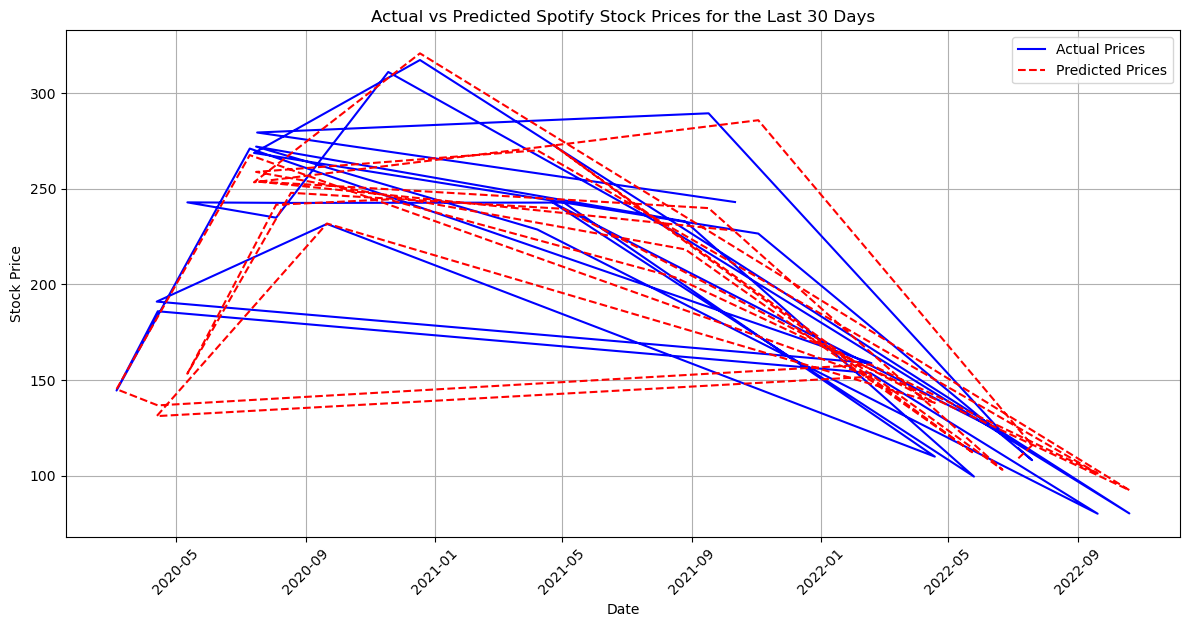

In [77]:
# Extracting the last 30 days of data for better visualization
last_30_days = y_test.tail(30)
predictions_last_30_days = predictions[-30:]

plt.figure(figsize=(14,7))

# Plotting actual prices
plt.plot(last_30_days.index, last_30_days.values, color='blue', marker='o', label='Actual Prices')

# Plotting predicted prices
plt.plot(last_30_days.index, predictions_last_30_days, color='red', linestyle='dashed', marker='o', label='Predicted Prices')

plt.title('Actual vs Predicted Spotify Stock Prices for the Last 30 Days')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


1. Initial Observations: At the beginning of the timeline (around 2020/05 on the graph), both the actual and predicted prices started at a higher range, close to 300. The predictions seemed to slightly underestimate the actual stock prices initially, as seen from the slight gap between the two lines.

2. Major Discrepancies: As we move forward in time, there are instances, especially around 2020/09 and 2021/01, where the predicted prices deviate significantly from the actual prices. This could indicate that during these times, unforeseen external factors might have influenced Spotify's stock, which the model did not anticipate.

3. Tight Convergences: Post the 2021/01 mark, there are moments when the predicted and actual prices are nearly indistinguishable, particularly around the 250 stock price mark. This suggests that the prediction model was extremely accurate during this period.

4. Descending Trend Analysis: The consistent descending trend in both the actual and predicted stock prices might be reflective of broader market conditions, internal company decisions, or industry-specific challenges. An analysis of external factors during this period might offer more clarity on the reasons for this decline.

5. Late Timeline Divergence: Towards the latter part of the graph, post 2022/05, the actual prices seem to stabilize, while the predicted prices continue to show a downward trend. This indicates that the model expected the decline to continue, while in reality, the stock began to stabilize.

6. Volatility and Prediction Challenges: The erratic nature of the predicted prices, especially in the middle of the graph, suggests that the model may have struggled with periods of high volatility. It's possible that during these times, external news, industry shifts, or global events might have influenced stock behavior in ways challenging to predict.

7. Model's Responsiveness: Given the fluctuating nature of the predicted prices and their occasional alignment with the actual prices, the model appears to be responsive and might be using recent data points to adjust its forecasts continually.



## Conclusion

In this exploratory analysis, I did on a comprehensive journey through Spotify's stock performance landscape, capturing a multi-dimensional view of its evolution. Key findings include:

- Data Integrity: My dataset, sourced directly from Yahoo Finance, was comprehensive and free from missing values. This assured me of the reliability of the subsequent analyses I conducted.

- Trend Analysis: By visualizing Spotify's stock price trajectory, I gained a clear understanding of its financial trajectory and market perception over the years. The rolling averages were particularly enlightening, revealing both short-term and long-term trends that could be invaluable for future predictive models.

- Volatility: I pinpointed specific periods of heightened volatility in Spotify's stock price. While my initial exploration showed potential correlations with external events, investors could do further research to solidify these findings.

- Comparative Analysis: The correlation matrix of daily returns provided a comparative lens, showing me how Spotify's stock behaves in relation to tech giants like Apple, Microsoft, and Google. This comparison offered insights into the broader tech industry's dynamics and potential strategies for investment diversification.

- Influence of Global Events: 2020 was a stormy year, with the global pandemic impacting almost every area of the business world. By visualizing and annotating Spotify's stock performance during this period, I was able to see the company's resilience and adaptability amidst these global challenges.

- External Data and Web Scraping: I touched upon the potential of integrating supplementary data through web scraping. I believe that correlating stock price movements with major announcements or financial reports could be a fruitful avenue for researchers. 

This project underscored the immense potential of data-driven decision-making in finance. By employing a diverse array of analytical techniques, I was able to gain a well-rounded perspective on Spotify's stock performance.